In [60]:
import random
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import math

- Derive and implement the inverse CDF for an exponential distribution with rate parameter 𝜆 = 1.

In [4]:
def exponential_distribution(x, lamb):
    return lamb * np.exp(-lamb * x)

def inverse_exponetial_CDF(y, lamb):
    return -np.log(1 - y) / lamb

- Generate 1000 random variables using this inverse CDF and create a histogram of the results.
- Overlay the theoretical probability density function of the exponential distribution on the histogram.


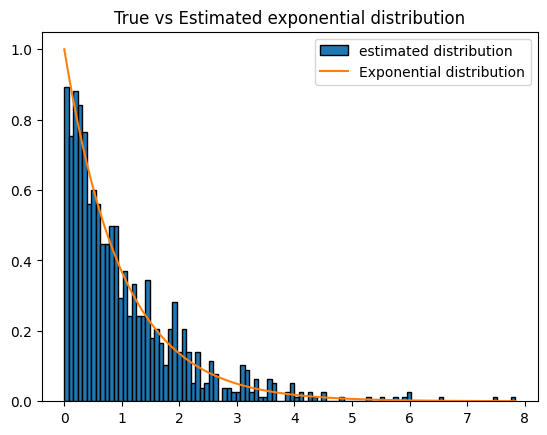

In [84]:
Y = np.random.uniform(0, 1, 1000)
X = inverse_exponetial_CDF(Y, 1)
plt.hist(X, bins=100, density=True, label='estimated distribution', edgecolor='black')
X2 = np.linspace(min(X), max(X), 100)
plt.plot(X2, exponential_distribution(X2, 1), label='Exponential distribution')
plt.title('True vs Estimated exponential distribution')
plt.legend()
plt.show()

- Compare the effectiveness of the inverse transform sampling method to direct sampling methods available in NumPy. Discuss the findings in your report.

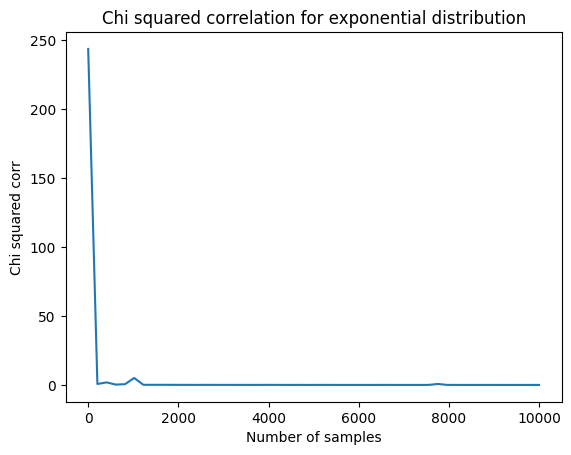

In [79]:
def monte_carlo_integral_approximation(func, a, b, N):
    x = np.random.uniform(a, b, N)
    y = func(x)
    return (b-a)*np.sum(y)/N

def chi_squared_corr(O, E):
    O = O if isinstance(O, np.ndarray) else np.array(O)
    E = E if isinstance(E, np.ndarray) else np.array(E)
    return np.sum((O-E)**2 / np.array(E))

def get_exp_chi2_corr(number_samples, number_bins, lamb):
    Y = np.random.uniform(0, 1, number_samples)
    X = inverse_exponetial_CDF(Y, lamb)
    hist, bins = np.histogram(X, bins=number_bins, density=True)

    O = []
    E = []

    for i in range(len(bins)-1):
        O.append(hist[i]*(bins[i+1] - bins[i]))
        func = partial(exponential_distribution, lamb=lamb)
        E.append(monte_carlo_integral_approximation(func, bins[i], bins[i+1], number_samples))

    O = np.array(O)
    E = np.array(E)

    return chi_squared_corr(O, E)

X = np.linspace(1, 10000, 50).astype(int)
Y = np.array([get_exp_chi2_corr(i, 100, 1) for i in X])
plt.plot(X, Y)
plt.title('Chi squared correlation for exponential distribution')
plt.xlabel('Number of samples')
plt.ylabel('Chi squared corr')
plt.show()

- Do the same as previous analysis but now with another distribution instead of exponential.

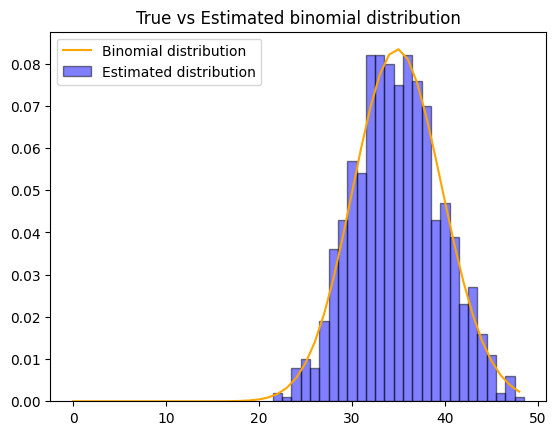

In [89]:
def binomial_distribution(n, k, p):
    return math.comb(n,k)*(p**k)*((1-p)**(n-k))

def bernoulli(p):
    return 1 if random.random() < p else 0

def inverse_binomial_CDF(n, p):
    sum = 0
    for i in range(n):
        sum += bernoulli(p)
    return sum

n = 100
p = 0.35

X = np.array([inverse_binomial_CDF(n, p) for _ in range(1000)])
unique = np.unique(X)
hist, bins = np.histogram(X, bins=len(unique), density=True)
hist=hist/np.sum(hist)

for i in range(len(bins)-2):
    plt.bar(bins[i], hist[i], width=bins[i+1]-bins[i], color='blue', alpha=0.5, edgecolor='black')
plt.bar(bins[-2], hist[-1], width=bins[-1]-bins[-2], color='blue', alpha=0.5, edgecolor='black', label='Estimated distribution')

K = list(range(0,max(X),1))
Y = np.array([binomial_distribution(n, k, p) for k in K])

plt.plot(K, Y, label='Binomial distribution', color='orange')
plt.title('True vs Estimated binomial distribution')
plt.legend()
plt.show()
    

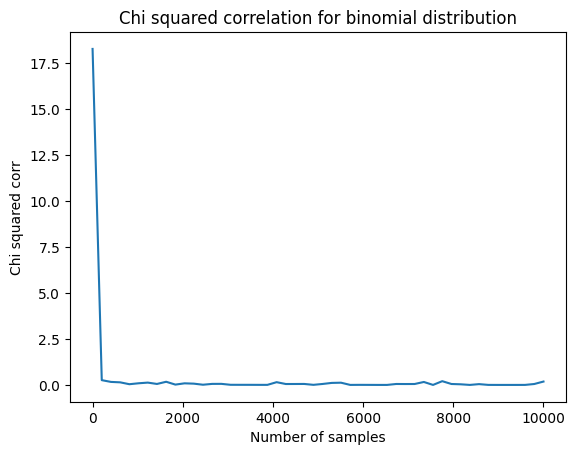

In [80]:
def get_binomial_chi2_corr(number_samples, n, p):

    X = np.array([inverse_binomial_CDF(n, p) for _ in range(number_samples)])
    unique = np.unique(X)
    hist, bins = np.histogram(X, bins=len(unique), density=True)
    hist=hist/np.sum(hist)

    O = hist
    E = []
    for e in unique:
        E.append(binomial_distribution(n, e, p))
    E = np.array(E)

    return chi_squared_corr(O, E)

n = 100
p = 0.35

X = np.linspace(1, 10000, 50).astype(int)
Y = np.array([get_binomial_chi2_corr(i, n, p) for i in X])
plt.plot(X, Y)
plt.title('Chi squared correlation for binomial distribution')
plt.xlabel('Number of samples')
plt.ylabel('Chi squared corr')
plt.show()

- Write a function to generate 𝑛 random samples from the uniform distribution over [0, 1], compute 𝑔(𝑋𝑖), and apply the importance sampling estimator to estimate the integral.

In [92]:
g = lambda x: np.exp(-x**2/2)
f = lambda x: 1

def importance_sampling_estimator(g, f, number_samples):
    X = np.random.normal(0, 1, number_samples)
    Y = g(X)/f(X)
    return np.mean(Y)

- Evaluate this function for 𝑛 = 1, 10, and 100, and repeat each experiment 100 times. Store the estimates.

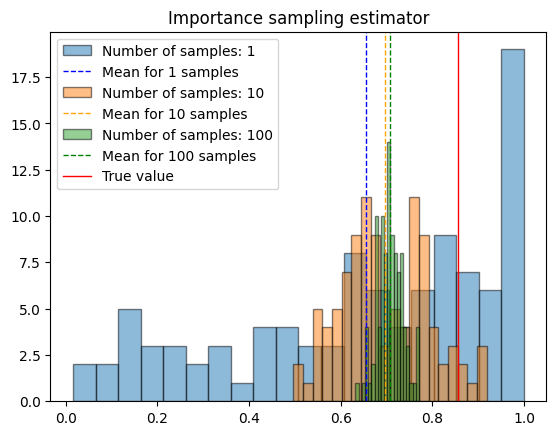

In [134]:
times = 100
num_samples = [1,10,100]
results = {}

for n in num_samples:
    results[n] = [importance_sampling_estimator(g, f, n) for _ in range(times)]

colors = ['blue', 'orange', 'green']

for k,v in results.items():
    plt.hist(v, bins=20, edgecolor='black', alpha=0.5, label=f'Number of samples: {k}')
    plt.axvline(np.mean(v), color=colors.pop(0), linestyle='dashed', linewidth=1, label=f'Mean for {k} samples')
plt.axvline(0.855624, color='red', linewidth=1, label='True value')


plt.title('Importance sampling estimator')
plt.legend()
plt.show()